In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

import mltools as ml

In [4]:
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
np.random.seed(0)

X,Y = ml.shuffleData(X,Y)

In [5]:
scaler = StandardScaler()

    Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
    Xtr_scaled = scaler.fit_transform(Xtr, Ytr)

In [6]:
not_scaled_knn = ml.knn.knnClassify()

not_scaled_knn.train(Xtr, Ytr)

# Feature Comparison on Numeric

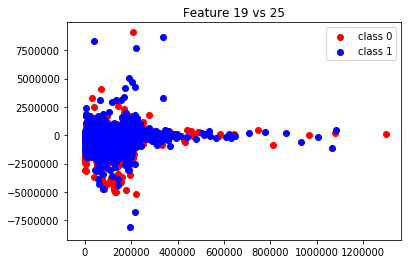

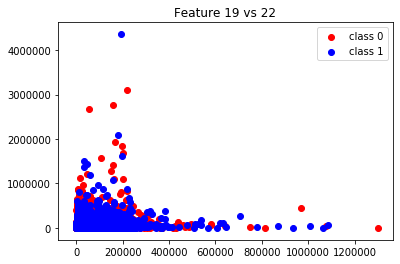

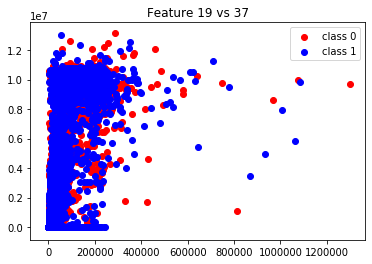

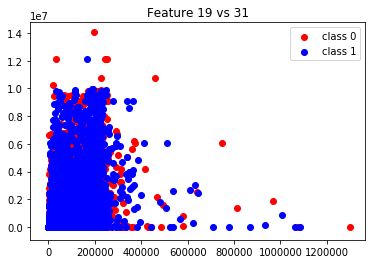

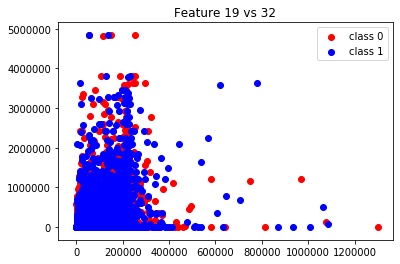

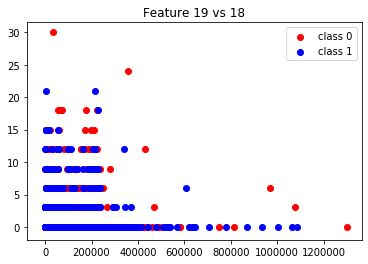

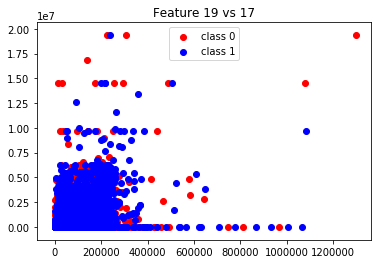

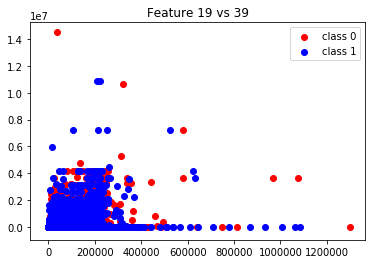

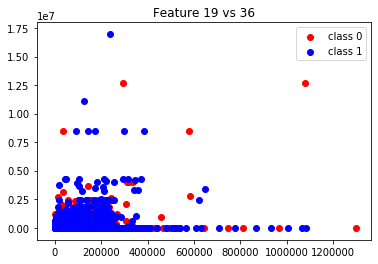

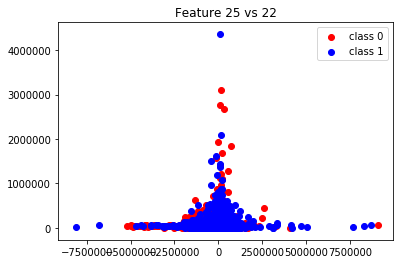

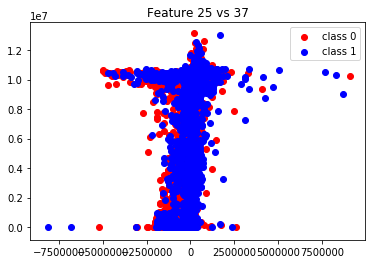

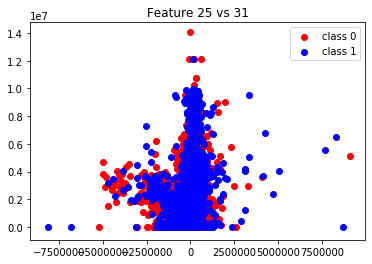

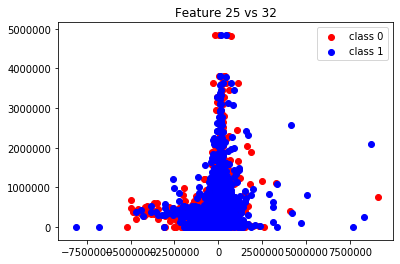

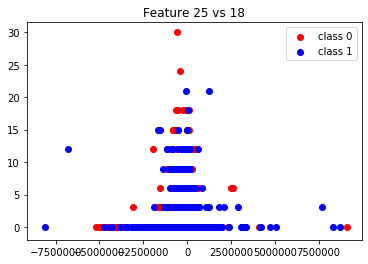

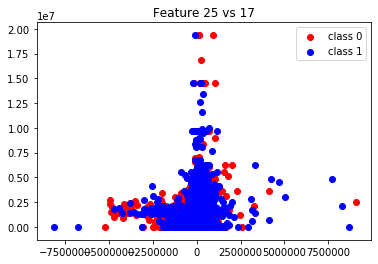

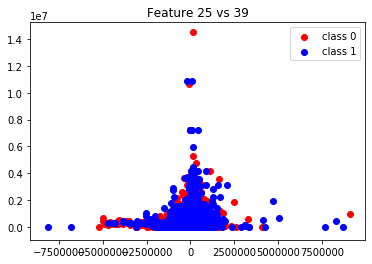

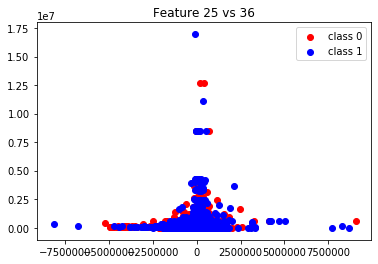

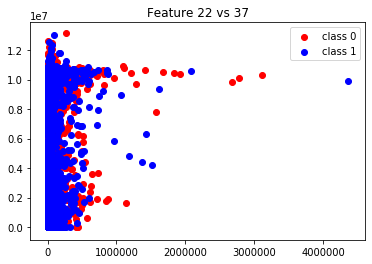

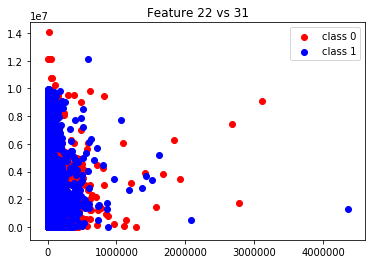

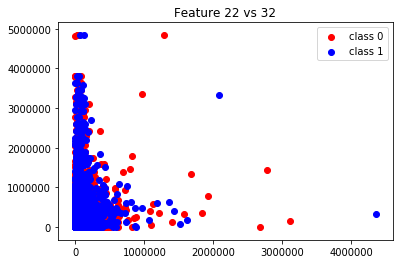

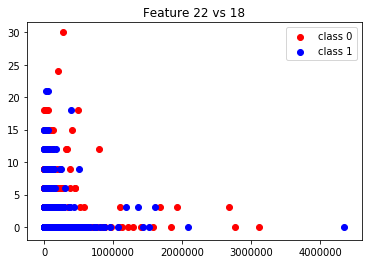

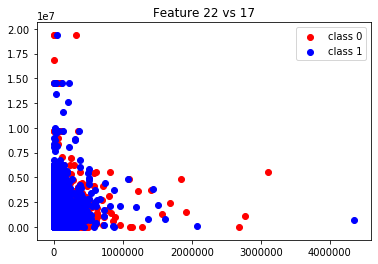

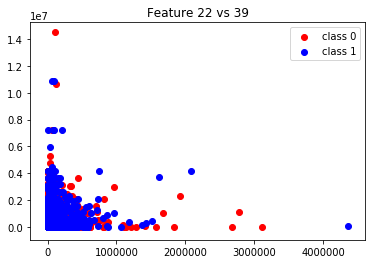

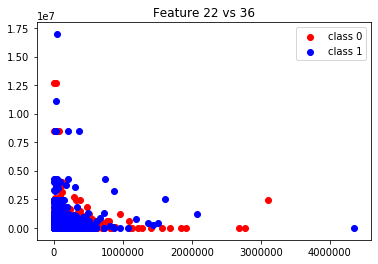

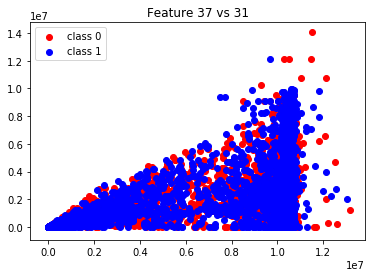

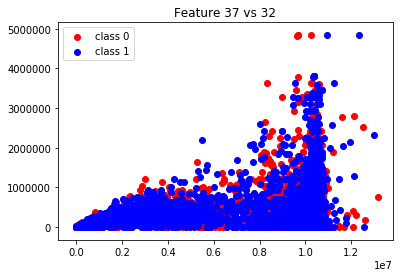

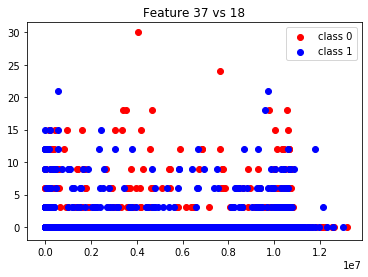

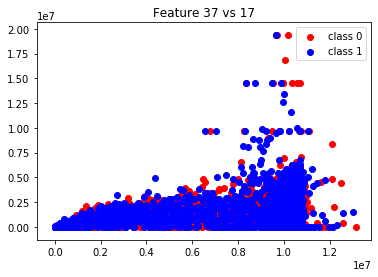

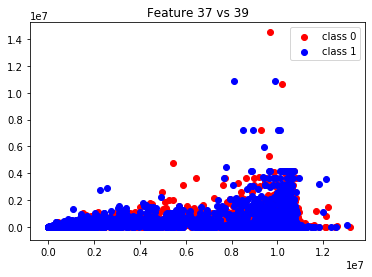

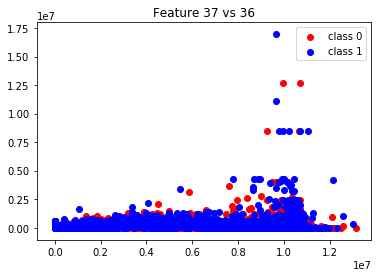

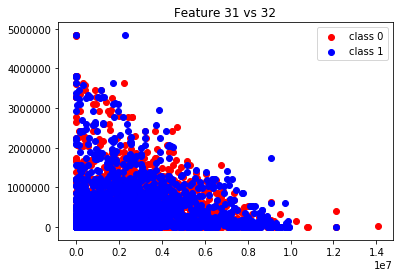

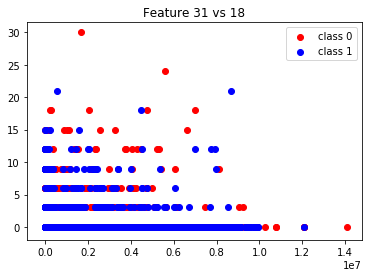

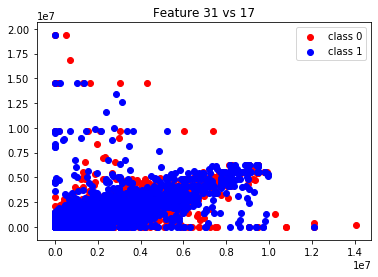

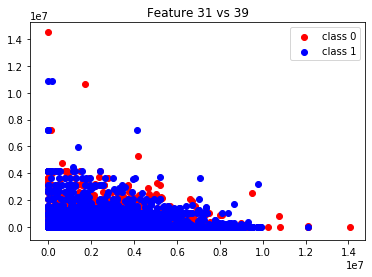

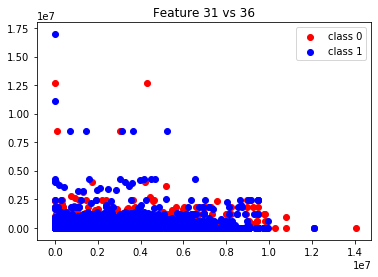

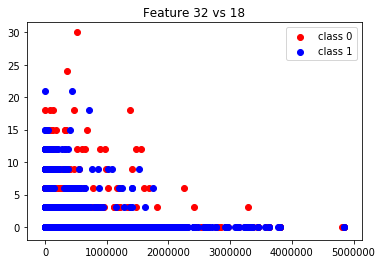

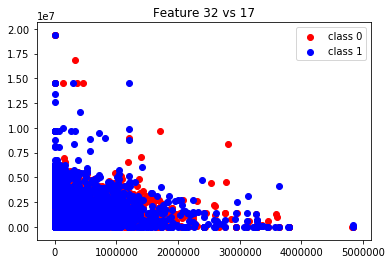

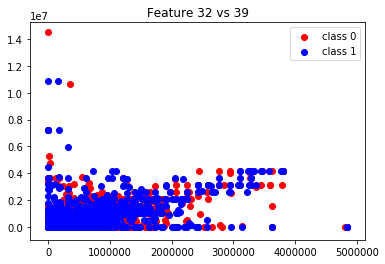

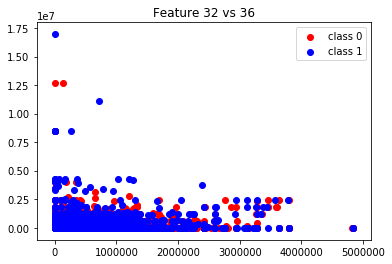

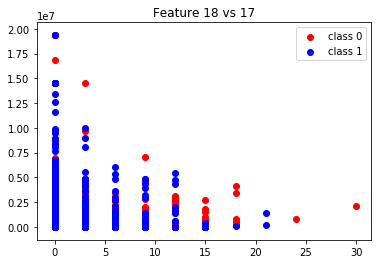

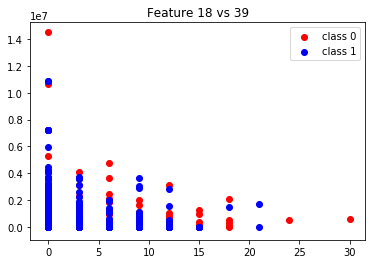

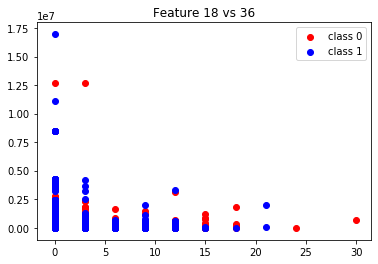

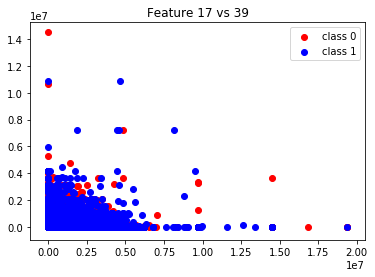

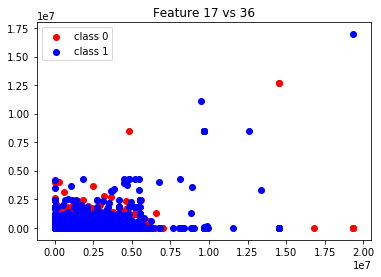

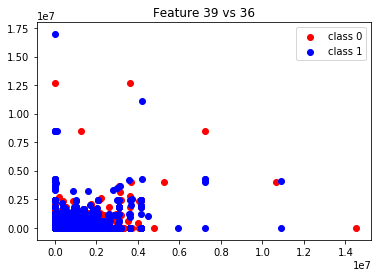

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the scatters and compare against features
# Used the top 10 information gain and plotted against each other
colors = ['red', 'blue']

compare = [18, 24, 21, 36, 30, 31, 17, 16, 38, 35]

for index, feature in enumerate(compare):
    for ind, feature2 in enumerate(compare[index+1:]):
        if feature == feature2:
            break
        for i,c in enumerate(np.unique(Ytr)):
            mask = np.where(Ytr == c)[0]
            plt.scatter(Xtr[mask,feature], Xtr[mask,feature2], c=colors[i], label='class %d' % c)
            plt.title("Feature " + str(feature + 1) + " vs " + str(feature2 + 1))
            
        plt.legend()
        plt.show()
        plt.clf()



# Feature Compare on Categorical

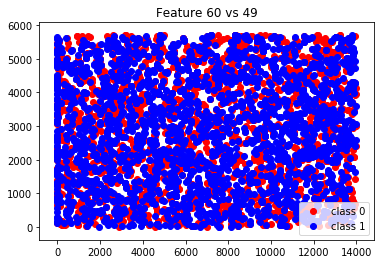

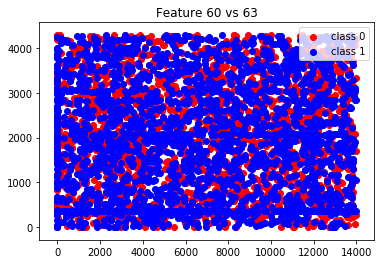

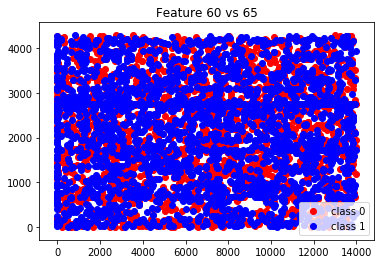

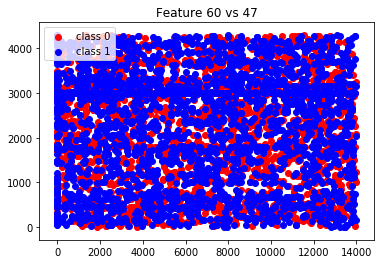

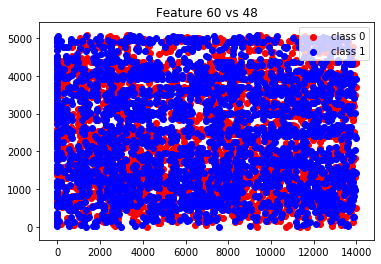

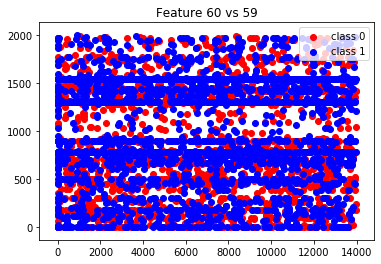

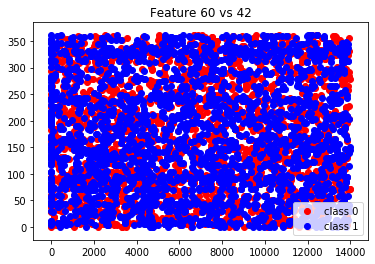

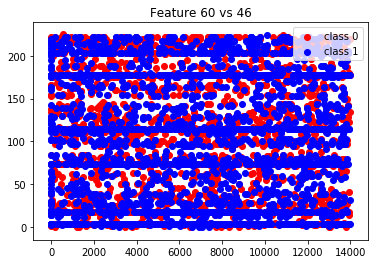

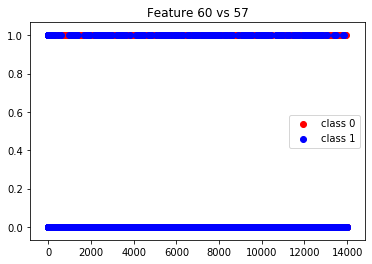

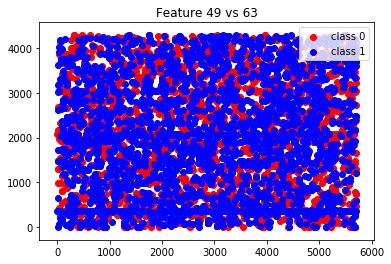

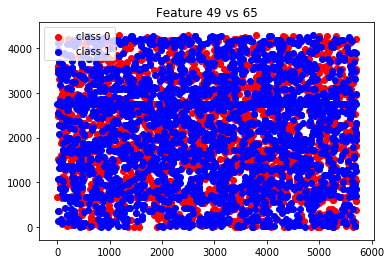

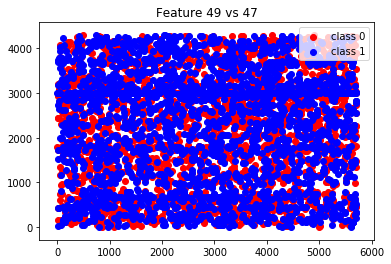

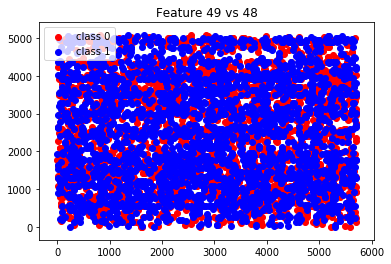

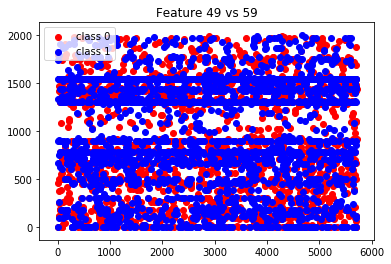

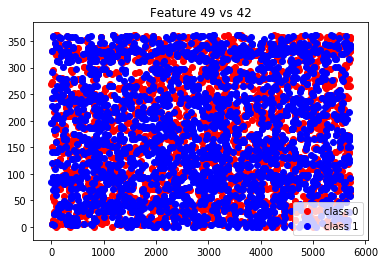

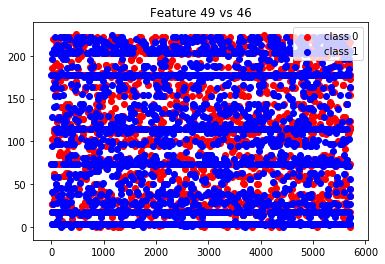

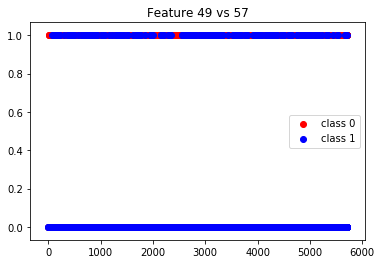

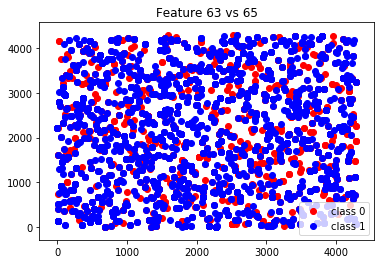

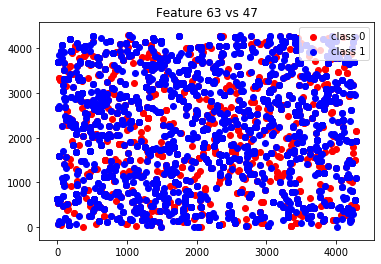

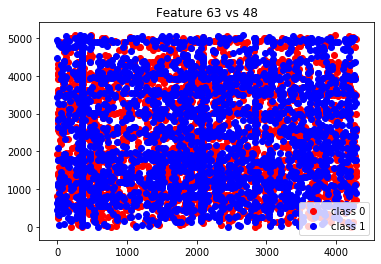

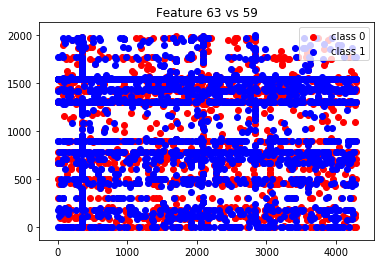

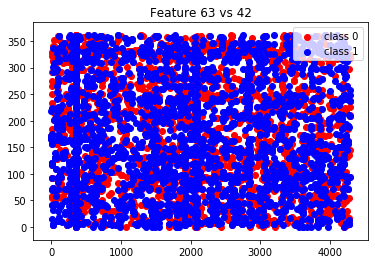

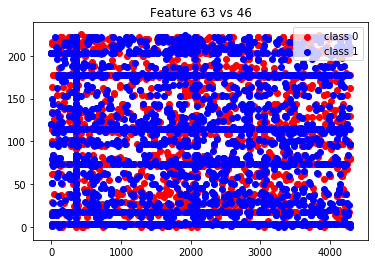

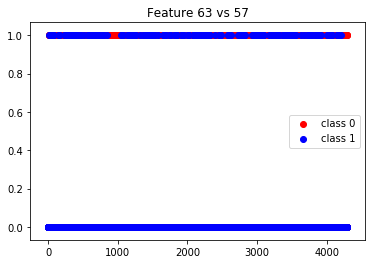

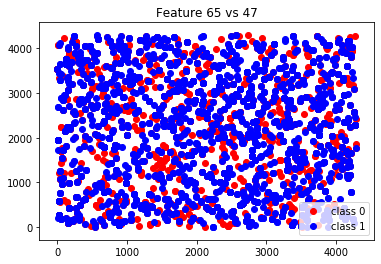

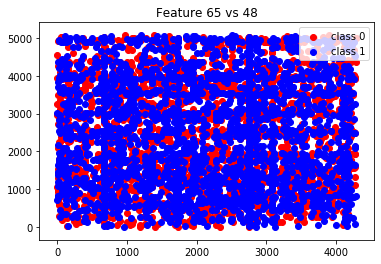

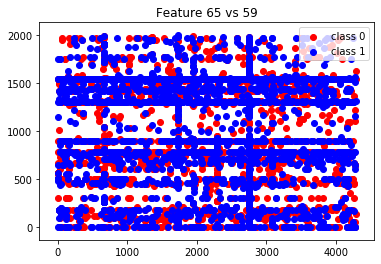

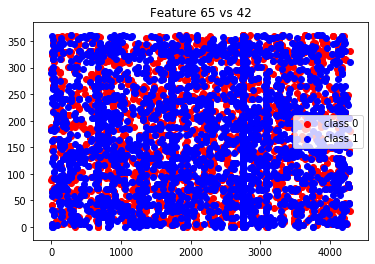

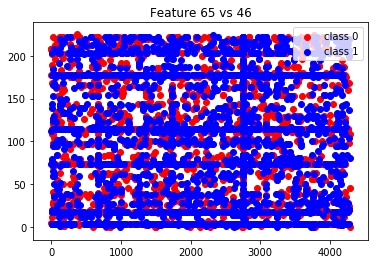

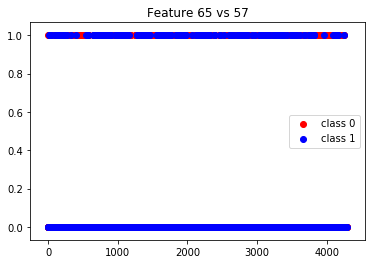

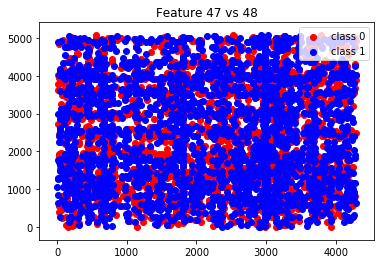

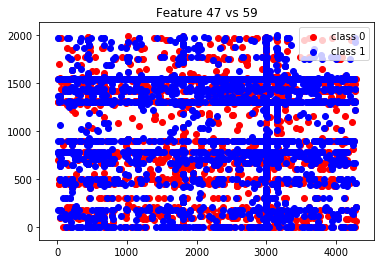

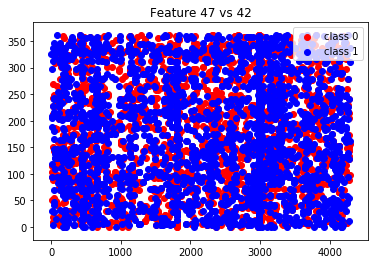

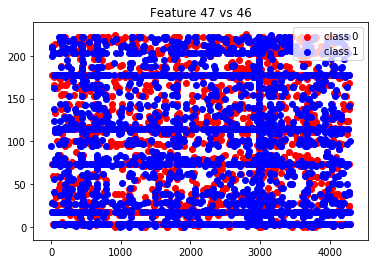

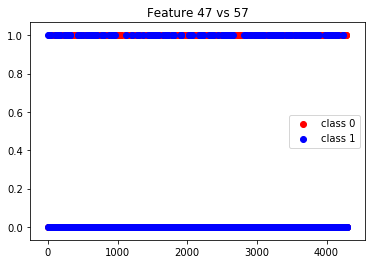

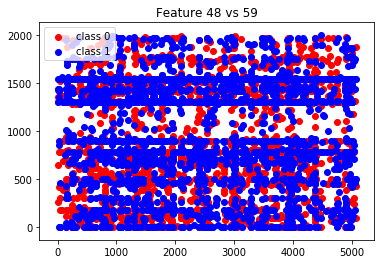

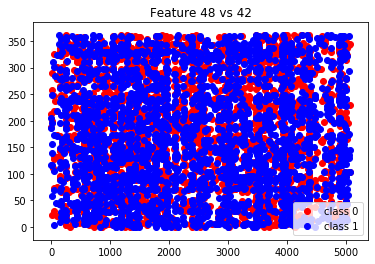

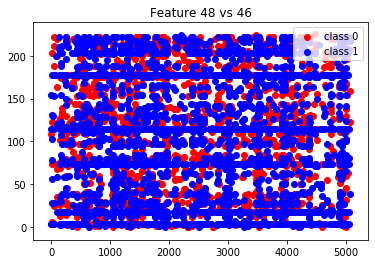

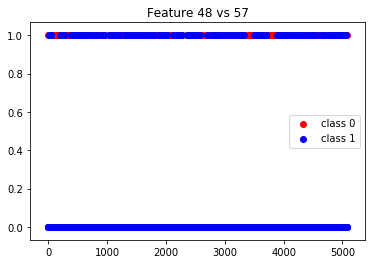

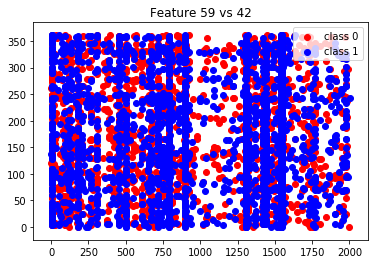

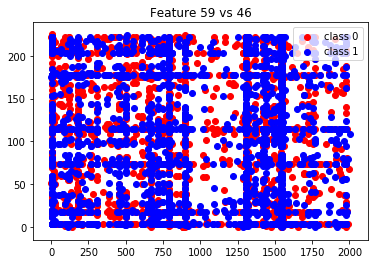

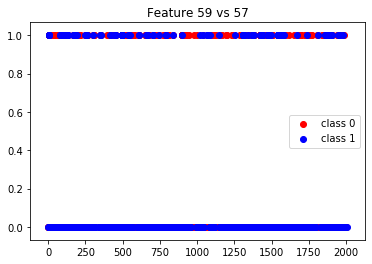

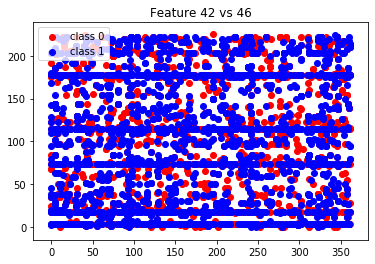

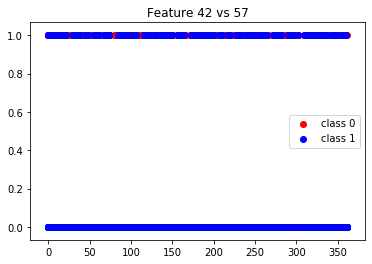

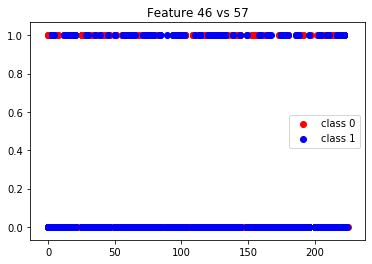

<Figure size 432x288 with 0 Axes>

In [16]:
compare = [59, 48, 62, 64, 46, 47, 58, 41, 45, 56]

for index, feature in enumerate(compare):
    for ind, feature2 in enumerate(compare[index+1:]):
        if feature == feature2:
            break
        for i,c in enumerate(np.unique(Ytr)):
            mask = np.where(Ytr == c)[0]
            plt.scatter(Xtr[mask,feature], Xtr[mask,feature2], c=colors[i], label='class %d' % c)
            plt.title("Feature " + str(feature + 1) + " vs " + str(feature2 + 1))
            
        plt.legend()
        plt.show()
        plt.clf()


In [11]:
not_scaled_auc = not_scaled_knn.auc(Xva, Yva)

not_scaled_err = not_scaled_knn.err(Xva, Yva)

print(f"Dumb auc {not_scaled_auc} | Dumb Error {not_scaled_err}")

Dumb auc 0.5243224932249322 | Dumb Error 0.4755276156264032


In [12]:
scaled_knn = ml.knn.knnClassify()
scaled_knn.train(Xtr_scaled, Ytr)

In [13]:
scaled_auc = scaled_knn.auc(Xva, Yva)

scaled_err = scaled_knn.err(Xva, Yva)

print(f"Scaled auc {scaled_auc} | Scaled Error {scaled_err}")

Scaled auc 0.5228154439282489 | Scaled Error 0.4768747193533902


In [14]:
help(ml.shuffleData)

Help on function shuffleData in module mltools.utils:

shuffleData(X, Y=None)
    Shuffle (randomly reorder) data in X and Y.
    
    Parameters
    ----------
    X : MxN numpy array: N feature values for each of M data points
    Y : Mx1 numpy array (optional): target values associated with each data point
    
    Returns
    -------
    X,Y  :  (tuple of) numpy arrays of shuffled features and targets
            only returns X (not a tuple) if Y is not present or None
    
    Ex:
    X2    = shuffleData(X)   : shuffles the rows of the data matrix X
    X2,Y2 = shuffleData(X,Y) : shuffles rows of X,Y, preserving correspondence

